In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly import figure_factory as figfac
from termcolor import colored

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,LSTM
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import math
from sklearn.metrics import mean_squared_error
#!pip install keras-tuner --upgrade
from kerastuner.engine.hyperparameters import HyperParameters
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

# to ignore warnings
import warnings
warnings.filterwarnings("ignore")

print(colored("Required libraries were succesfully imported...", color = "green", attrs = ["bold", "dark"]))

Required libraries were succesfully imported...


C:\Users\julo\AppData\Local\Temp\ipykernel_28328\557657729.py:15: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.engine.hyperparameters import HyperParameters


In [8]:
df = pd.read_csv("./gold.csv")
fig = figfac.create_table(df.head(n = 10))
fig.show()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1718 non-null   object 
 1   Open           1718 non-null   float64
 2   High           1718 non-null   float64
 3   Low            1718 non-null   float64
 4   Close          1718 non-null   float64
 5   Adj Close      1718 non-null   float64
 6   Volume         1718 non-null   int64  
 7   SP_open        1718 non-null   float64
 8   SP_high        1718 non-null   float64
 9   SP_low         1718 non-null   float64
 10  SP_close       1718 non-null   float64
 11  SP_Ajclose     1718 non-null   float64
 12  SP_volume      1718 non-null   int64  
 13  DJ_open        1718 non-null   float64
 14  DJ_high        1718 non-null   float64
 15  DJ_low         1718 non-null   float64
 16  DJ_close       1718 non-null   float64
 17  DJ_Ajclose     1718 non-null   float64
 18  DJ_volum

In [10]:
df.describe().T.style.set_properties(**{"background-color": "#AB8111", "font-size" : "17px",
                                        "color": "#ffffff", "border-radius" : "1px", "border": "1.5px solid black"})

,count,mean,std,min,25%,50%,75%,max
Open,1718.000000,127.323434,17.526993,100.919998,116.220001,121.915001,128.427494,173.199997
High,1718.000000,127.854237,17.631189,100.989998,116.540001,122.325001,129.087498,174.070007
Low,1718.000000,126.777695,17.396513,100.230003,115.739998,121.369999,127.840001,172.919998
Close,1718.000000,127.319482,17.536269,100.500000,116.052502,121.795002,128.470001,173.610001
Adj Close,1718.000000,127.319482,17.536269,100.500000,116.052502,121.795002,128.470001,173.610001
Volume,1718.000000,8446327.124563,4920730.721927,1501600.000000,5412925.000000,7483900.000000,10207950.000000,93804200.000000
SP_open,1718.000000,204.490023,43.831928,122.059998,170.392498,205.464996,237.292500,293.089996
SP_high,1718.000000,205.372637,43.974644,122.320000,170.962506,206.459999,237.722500,293.940002
SP_low,1718.000000,203.487014,43.618940,120.029999,169.577499,204.430000,236.147503,291.809998
SP_close,1718.000000,204.491222,43.776999,120.290001,170.397500,205.529999,236.889996,293.579987


In [11]:
df.rename(columns = {"Date" : "date", "Open" : "open", "High" : "high", "Low" : "low",
                     "Close" : "close", "Volume" : "volume", "Currency" : "currency"}, inplace = True)

print(colored("Column names were succesfully changed...", color = "green", attrs = ["bold", "dark"]))

Column names were succesfully changed...


In [12]:
print("Shape of the dataset: ", df.shape)
print("Length of the dataset: ", len(df))
print("Maximum closing price of gold during last twenty two years: ", df["close"].max())
print("Minimum closing price of gold during last twenty two years: ", df["close"].min())

Shape of the dataset:  (1718, 81)
Length of the dataset:  1718
Maximum closing price of gold during last twenty two years:  173.610001
Minimum closing price of gold during last twenty two years:  100.5


In [13]:
corr = df.corr()
corr.style.background_gradient(cmap = "copper")

ValueError: could not convert string to float: '2011-12-15'

In [14]:
plt.figure(figsize = [15, 7], clear = True, facecolor = '#EAEAE6')
sns.heatmap(df.corr(), annot = True, square = False, linewidths = 5,
            linecolor = "white", cmap = "Oranges");

ValueError: could not convert string to float: '2011-12-15'

<Figure size 1500x700 with 0 Axes>

In [15]:
sns.set(rc={"axes.facecolor":"#AB8111", "figure.facecolor":"#ffffff"})
sns.pairplot(df, diag_kind = "reg", height = 2, aspect = 1, corner = True);

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001CBC47C5700> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

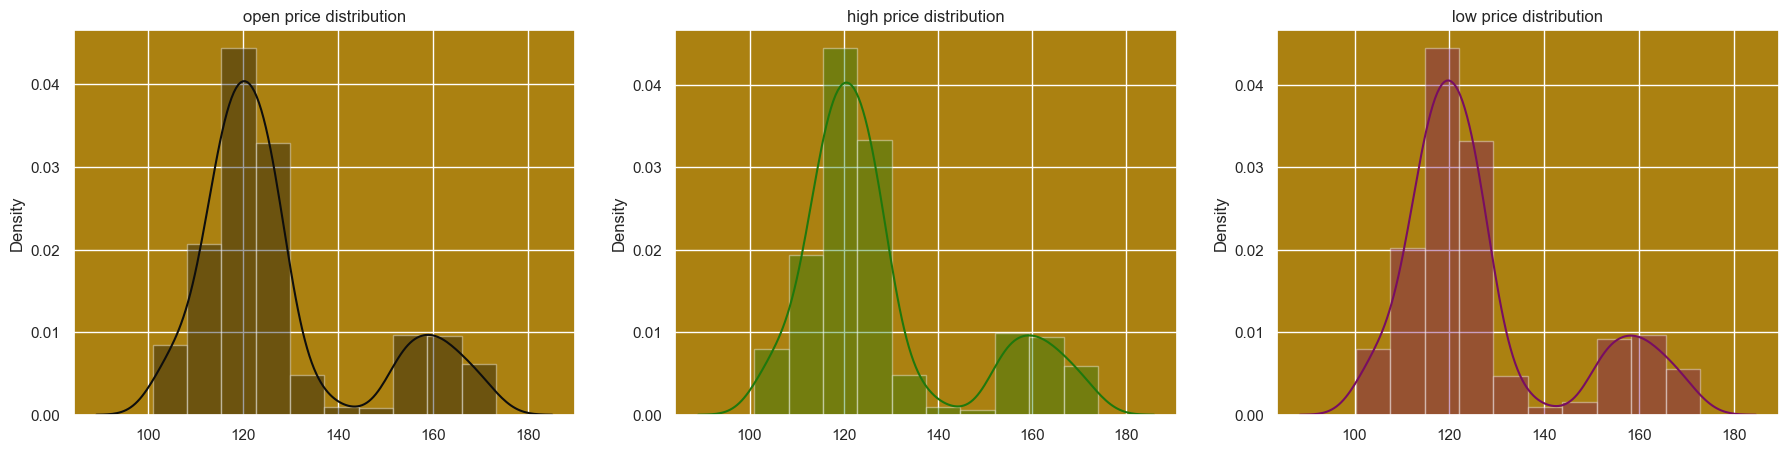

In [16]:
fig, axes = plt.subplots(1, 3, figsize = (22, 5))

sns.distplot(ax = axes[0], x = df["open"], hist = True, bins = 10, kde = True,
             vertical = False, color = "#0E0E0D").set(title = "open price distribution");

sns.distplot(ax = axes[1], x = df["high"], hist = True, bins = 10, kde = True,
             vertical = False, color = "#1F780D").set(title = "high price distribution");

sns.distplot(ax = axes[2], x = df["low"], hist = True, bins = 10, kde = True,
             vertical = False, color = "#780D62").set(title = "low price distribution");

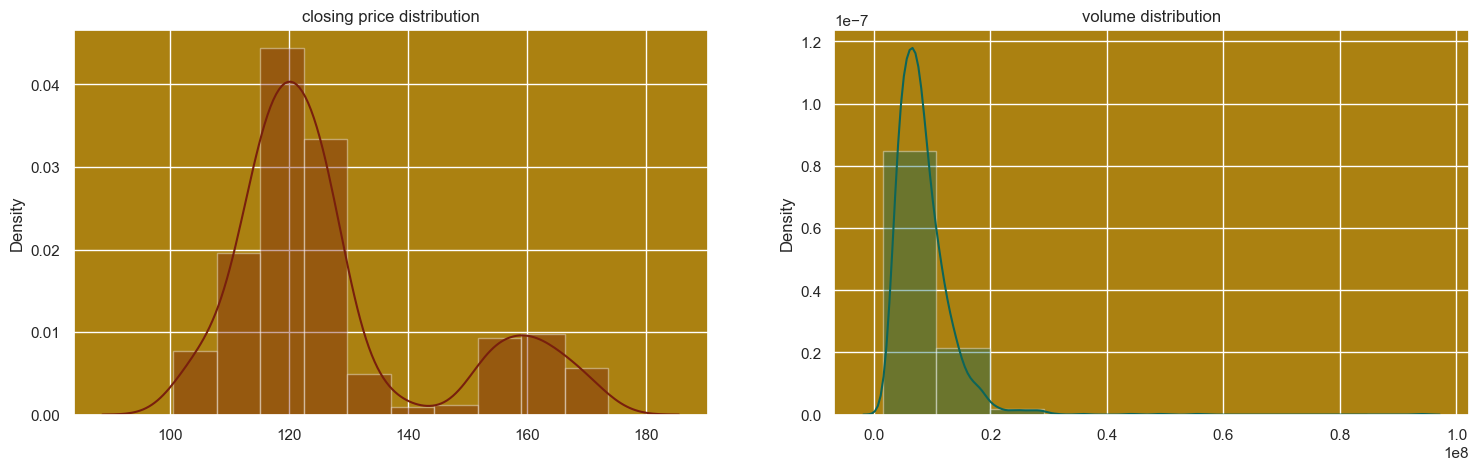

In [17]:
fig, axes = plt.subplots(1, 2, figsize = (18, 5))

sns.distplot(ax = axes[0], x = df["close"], hist = True, bins = 10, kde = True,
             vertical = False, color = "#781F0D").set(title = "closing price distribution");

sns.distplot(ax = axes[1], x = df["volume"], hist = True, bins = 10, kde = True,
             vertical = False, color = "#0D6559").set(title = "volume distribution");

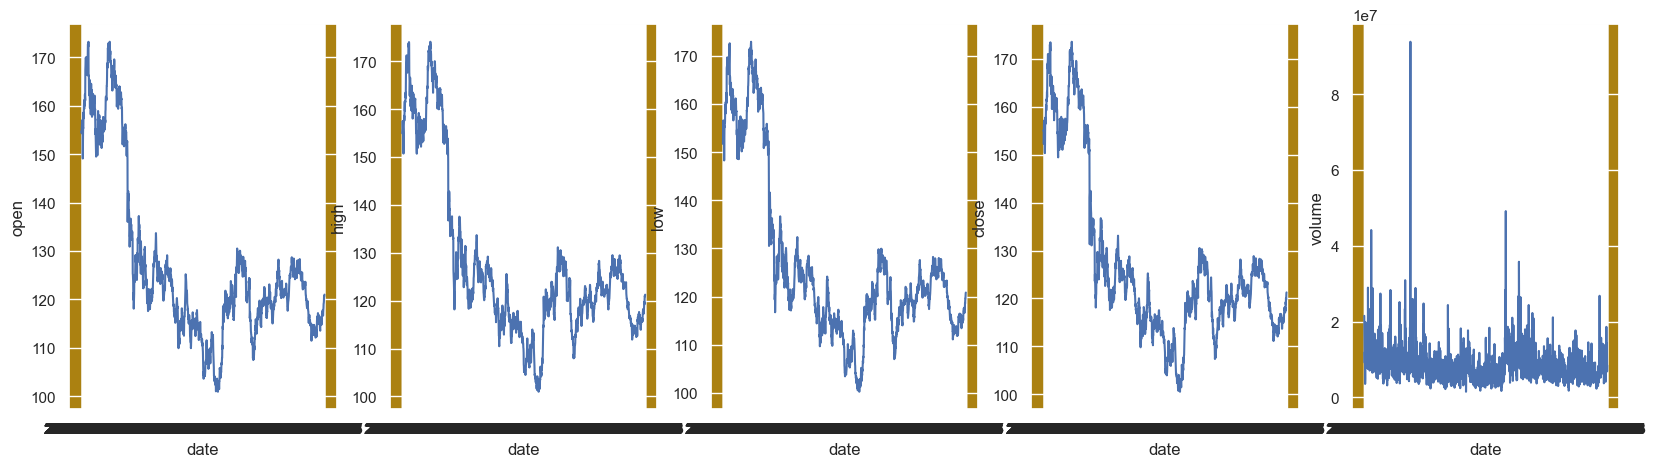

In [18]:
sns.set(rc = {"axes.facecolor":"#AB8111", "figure.facecolor":"#ffffff"})

fig, axes = plt.subplots(1, 5, figsize = (20, 5))
axes = axes.flatten()

sns.lineplot(ax = axes[0], x = df["date"], y = df["open"]);
sns.lineplot(ax = axes[1], x = df["date"], y = df["high"]);
sns.lineplot(ax = axes[2], x = df["date"], y = df["low"]);
sns.lineplot(ax = axes[3], x = df["date"], y = df["close"]);
sns.lineplot(ax = axes[4], x = df["date"], y = df["volume"]);

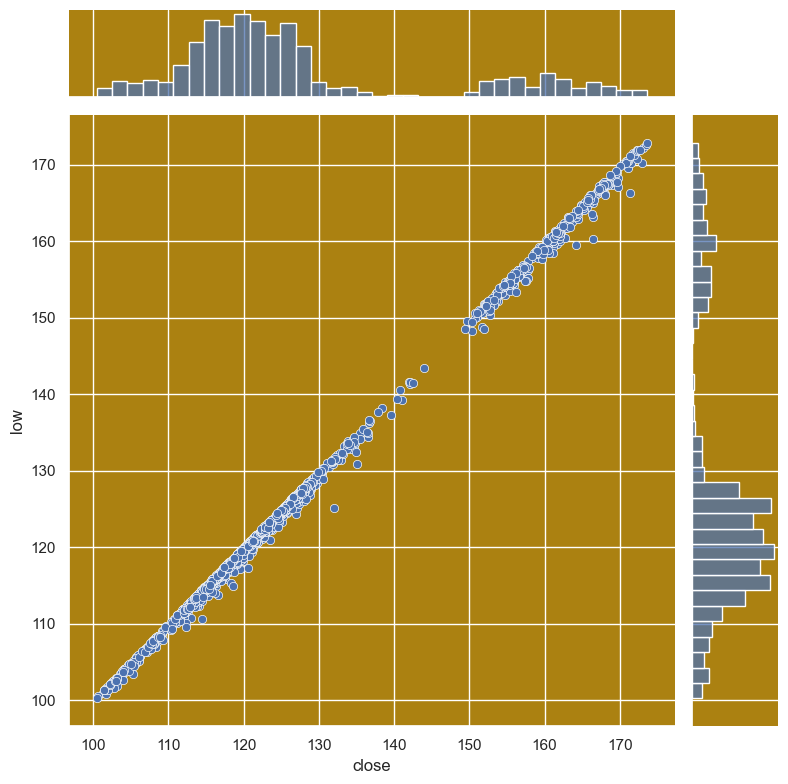

In [19]:
sns.jointplot(x = "close", y = "low", data = df, height = 8, ratio = 6, kind = "scatter");

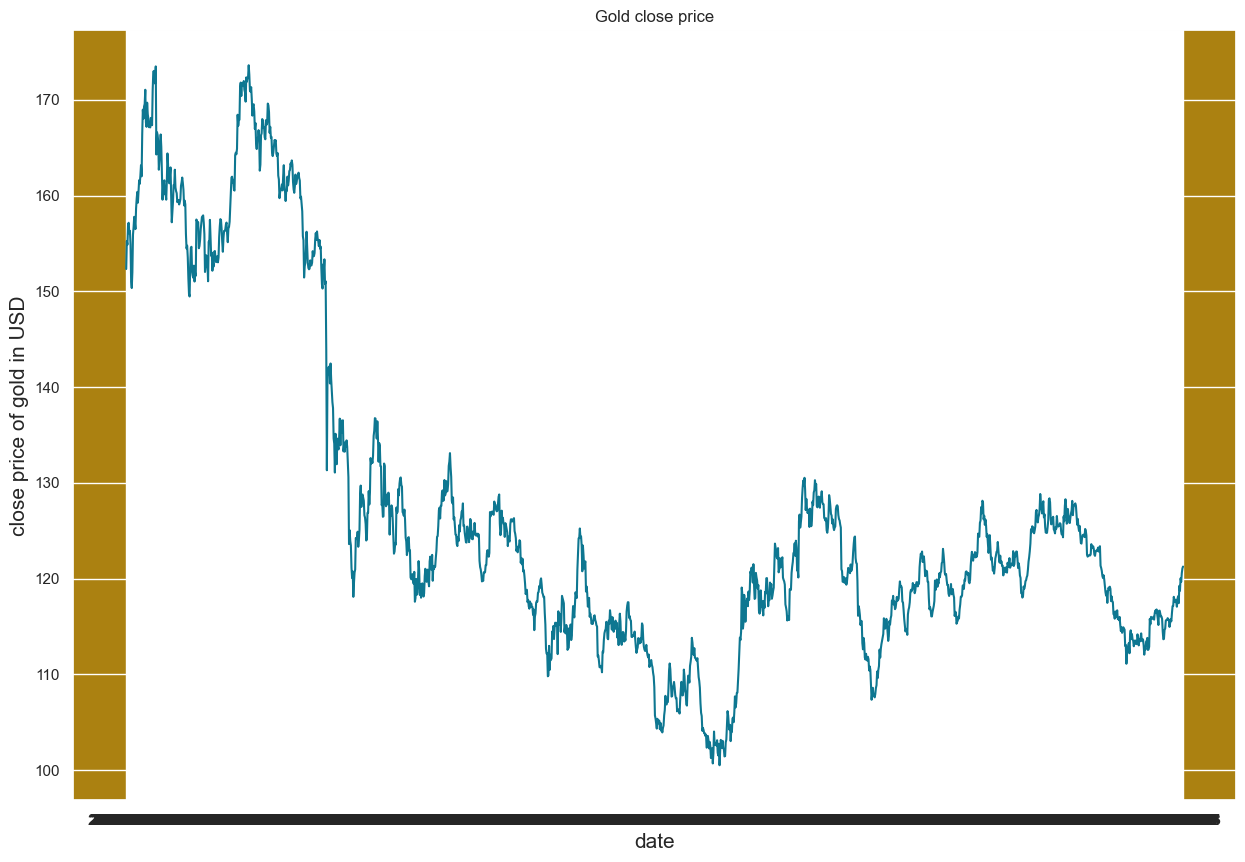

In [20]:
fig = plt.figure(figsize = (15, 10))

plt.plot(df["date"], df["close"], color = "#0E7791")
plt.title("Gold close price")
plt.xlabel("date", fontsize = 15)
plt.ylabel("close price of gold in USD", fontsize = 15)
plt.show()

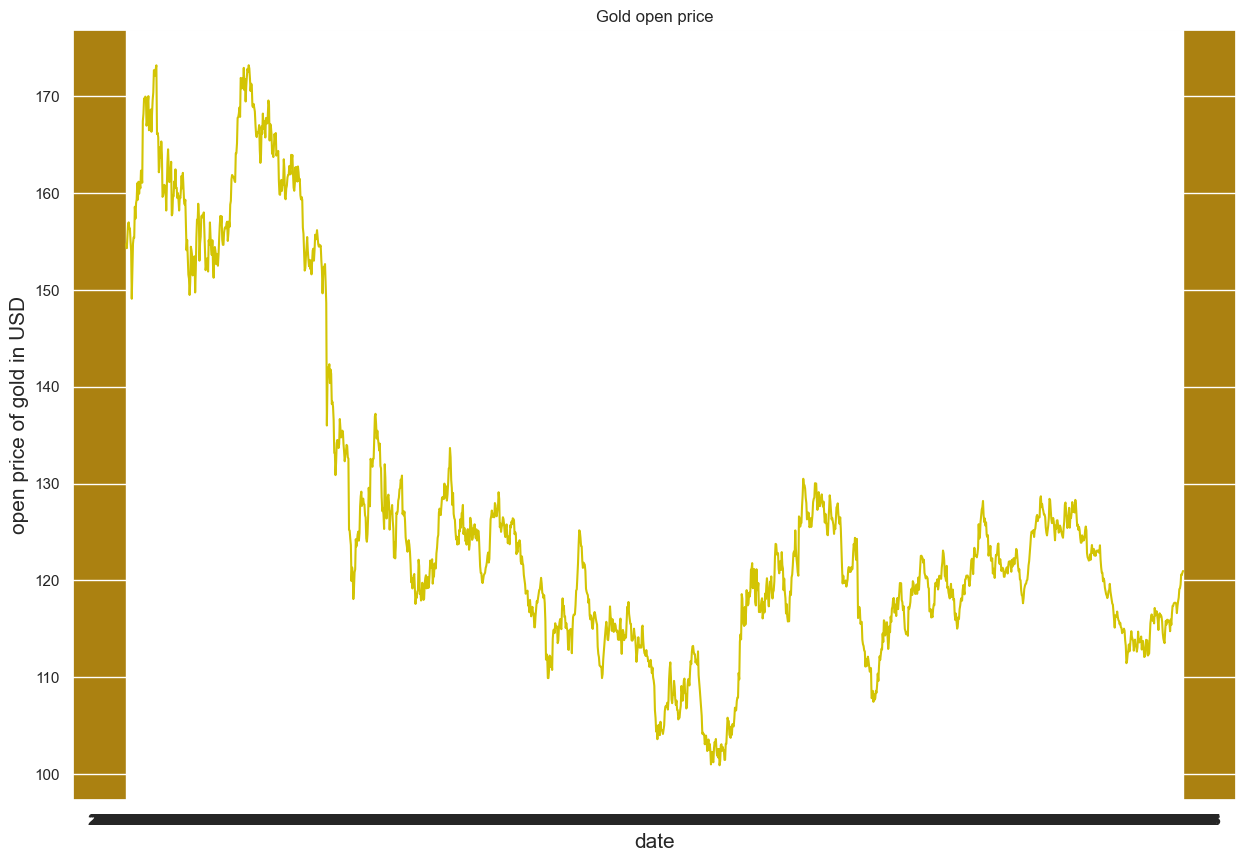

In [21]:
fig = plt.figure(figsize = (15, 10))

plt.plot(df["date"], df["open"], color = "#D3C404")
plt.title("Gold open price")
plt.xlabel("date", fontsize = 15)
plt.ylabel("open price of gold in USD", fontsize = 15)
plt.show()

In [22]:
fig = px.histogram(df, x = "close", y = "volume", marginal = "box", text_auto = True, template = "plotly_dark", hover_data  = df.columns)
fig.show()



In [23]:
data = df.filter(['close'])
data.head().style.set_properties(**{"background-color": "#AB8111", "font-size" : "17px",
                                    "color": "#ffffff", "border-radius" : "1px", "border": "1.5px solid black"})

,close
0,152.330002
1,155.229996
2,154.869995
3,156.979996
4,157.160004


In [24]:
dataset = data.values
dataset[0:5]

array([[152.330002],
       [155.229996],
       [154.869995],
       [156.979996],
       [157.160004]])

In [25]:
training_data_len = int(np.ceil( len(dataset) * .95 ))
print("Training data length: ", training_data_len)

Training data length:  1633


In [26]:
scaler = MinMaxScaler(feature_range = (0, 1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.70893176],
       [0.74859794],
       [0.74367384],
       ...,
       [0.27451785],
       [0.28122005],
       [0.2838189 ]])

In [27]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train, "\n")
        print(y_train)

[array([0.70893176, 0.74859794, 0.74367384, 0.77253447, 0.77499662,
       0.75967709, 0.76337023, 0.74422108, 0.6911503 , 0.68171242,
       0.70428128, 0.7580358 , 0.76884156, 0.78347693, 0.77554365,
       0.76596908, 0.79524002, 0.80932837, 0.81903986, 0.80372034,
       0.82068115, 0.83572706, 0.83052934, 0.84215574, 0.85706474,
       0.84133489, 0.901655  , 0.93653399, 0.92367663, 0.94118448,
       0.94460398, 0.9649843 , 0.9183422 , 0.91205023, 0.94651889,
       0.93010531, 0.92353991, 0.91150319, 0.916564  , 0.91122957,
       0.92477089, 0.9232663 , 0.91437567, 0.96457397, 0.99083574,
       0.99193001, 0.98112427, 0.97387493, 0.99835869, 0.87252075,
       0.90425387, 0.90056073, 0.89112287, 0.85077276, 0.86349342,
       0.88606207, 0.90110798, 0.8831898 , 0.84530163, 0.80796069])] 

[0.828614432654706]
[array([0.70893176, 0.74859794, 0.74367384, 0.77253447, 0.77499662,
       0.75967709, 0.76337023, 0.74422108, 0.6911503 , 0.68171242,
       0.70428128, 0.7580358 , 0.768

In [28]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [29]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print("The sape of x_train set:", x_train.shape)

The sape of x_train set: (1573, 60, 1)


In [30]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(128, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer = "adam", loss = "mean_squared_error")

model.fit(x_train, y_train, batch_size = 1, epochs = 1)




1573/1573 [==============================] - 24s 14ms/step - loss: 0.0022


In [31]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [32]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [33]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
predictions[0:10]

3/3 [==============================] - 1s 15ms/step


array([[113.33464 ],
       [113.64109 ],
       [113.872345],
       [113.87919 ],
       [113.74342 ],
       [113.43071 ],
       [113.19344 ],
       [113.09484 ],
       [113.01121 ],
       [112.93601 ]], dtype=float32)

In [34]:
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print("RMSE score of the model:", rmse)

RMSE score of the model: 0.9085691023777926


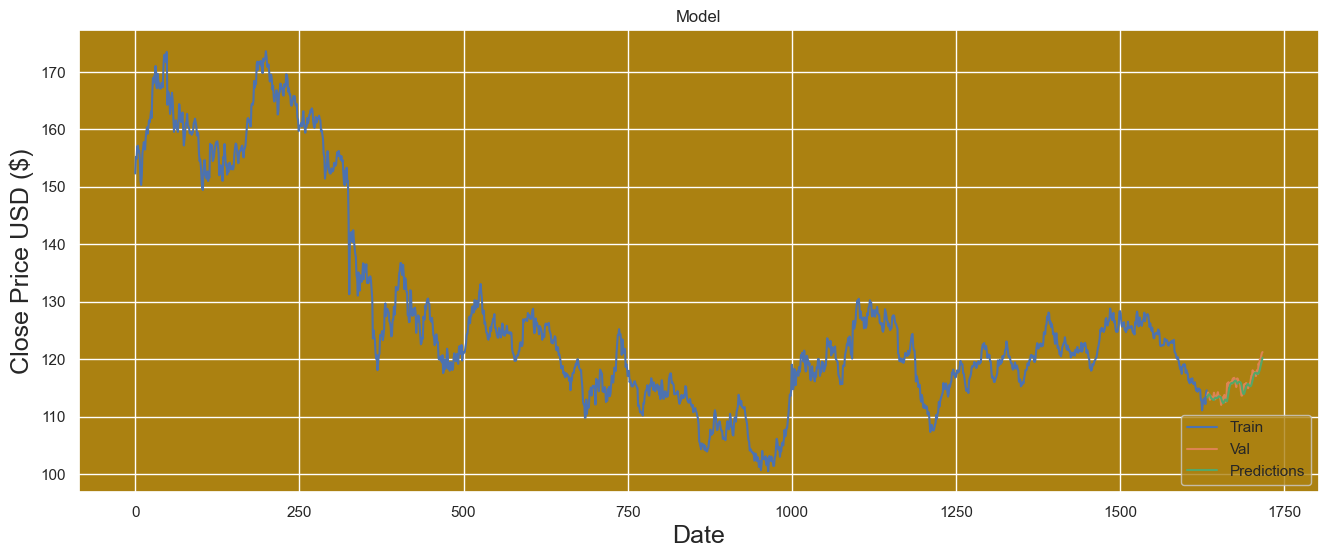

In [35]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

In [36]:
valid.head(n = 10)

,close,Predictions
1633,113.680000,113.334641
1634,114.199997,113.641090
1635,113.639999,113.872345
1636,113.510002,113.879189
1637,112.930000,113.743423
1638,113.320000,113.430710
1639,113.540001,113.193443
1640,113.230003,113.094841
1641,113.150002,113.011208
1642,113.220001,112.936012
